##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [21]:
%pip install pandas 
%pip install matplotlib
%pip install missingno
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [22]:
# Can have as many cells as you want for code
import pandas as pd
import missingno as msno
import datetime
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

### Section 0: Data Information
##### placeholder text

In [23]:
# assigning dataset into variable
data = pd.read_csv(filepath)

In [24]:
# 29182 rows, 28 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [25]:
# basic dataset information
data.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [26]:
# number of duplicate rows
data.duplicated().sum()

0

### Section 1: Data Preparation
##### placeholder text

#### Section 1.1: Making Things Convenient

In [27]:
# drop 1: removing mostly irrelevant and high-NaN columns
columns_to_drop = ['AccountID','Square Footage','Import/Export Status', 'Fiscal Year End','Company Description']
data = data.drop(columns = columns_to_drop)
data.columns

Index(['LATITUDE', 'LONGITUDE', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Global Ultimate Company',
       'Global Ultimate Country', 'Domestic Ultimate Company',
       'Is Domestic Ultimate', 'Is Global Ultimate'],
      dtype='object')

In [28]:
# noticed 'Industry' and '8-Digit SIC Description' have tailing strings: ', nec' and 'Not Elsewhere Classified'
# which can be redundant, decided to put into a separate column 'NEC'
data.insert(loc = 4, column = 'NEC', value = None)
data['NEC'] = data['Industry'].str.contains(', Not Elsewhere Classified')
data['Industry'] = data['Industry'].str.replace(', Not Elsewhere Classified', '').str.strip()
data['8-Digit SIC Description'] = data['8-Digit SIC Description'].str.replace(', nec', '').str.strip()

In [29]:
# also noticed using the actual company age might be more convenient as compared to using the specific year
current_year = datetime.date.today().year
data.insert(loc = 5, column = 'Age', value = None)
data['Age'] = current_year - data['Year Found']
data = data.drop(columns = 'Year Found')

In [30]:
# not sure if this is correct to do, removed the company names to anonymize
columns_to_drop = ['Company', 'Parent Company', 'Global Ultimate Company', 'Domestic Ultimate Company']
data = data.drop(columns = columns_to_drop)

In [31]:
# converting previously boolean column represented as int to be represented as boolean
columns_to_convert = ['Is Domestic Ultimate', 'Is Global Ultimate']
data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.astype(bool))

In [32]:
# counting columns containing NaNs
nan_cols = data.isna().sum()
nan_counts = {}
for col, cnt in nan_cols.items():
    if cnt > 0: nan_counts[col] = cnt
nan_counts

{'LATITUDE': 120,
 'LONGITUDE': 120,
 'Age': 434,
 'Parent Country': 520,
 'Employees (Single Site)': 12403,
 'Employees (Domestic Ultimate Total)': 79,
 'Employees (Global Ultimate Total)': 2774,
 'Global Ultimate Country': 523}

#### Section 1.2: Removing Null-Values

<AxesSubplot:>

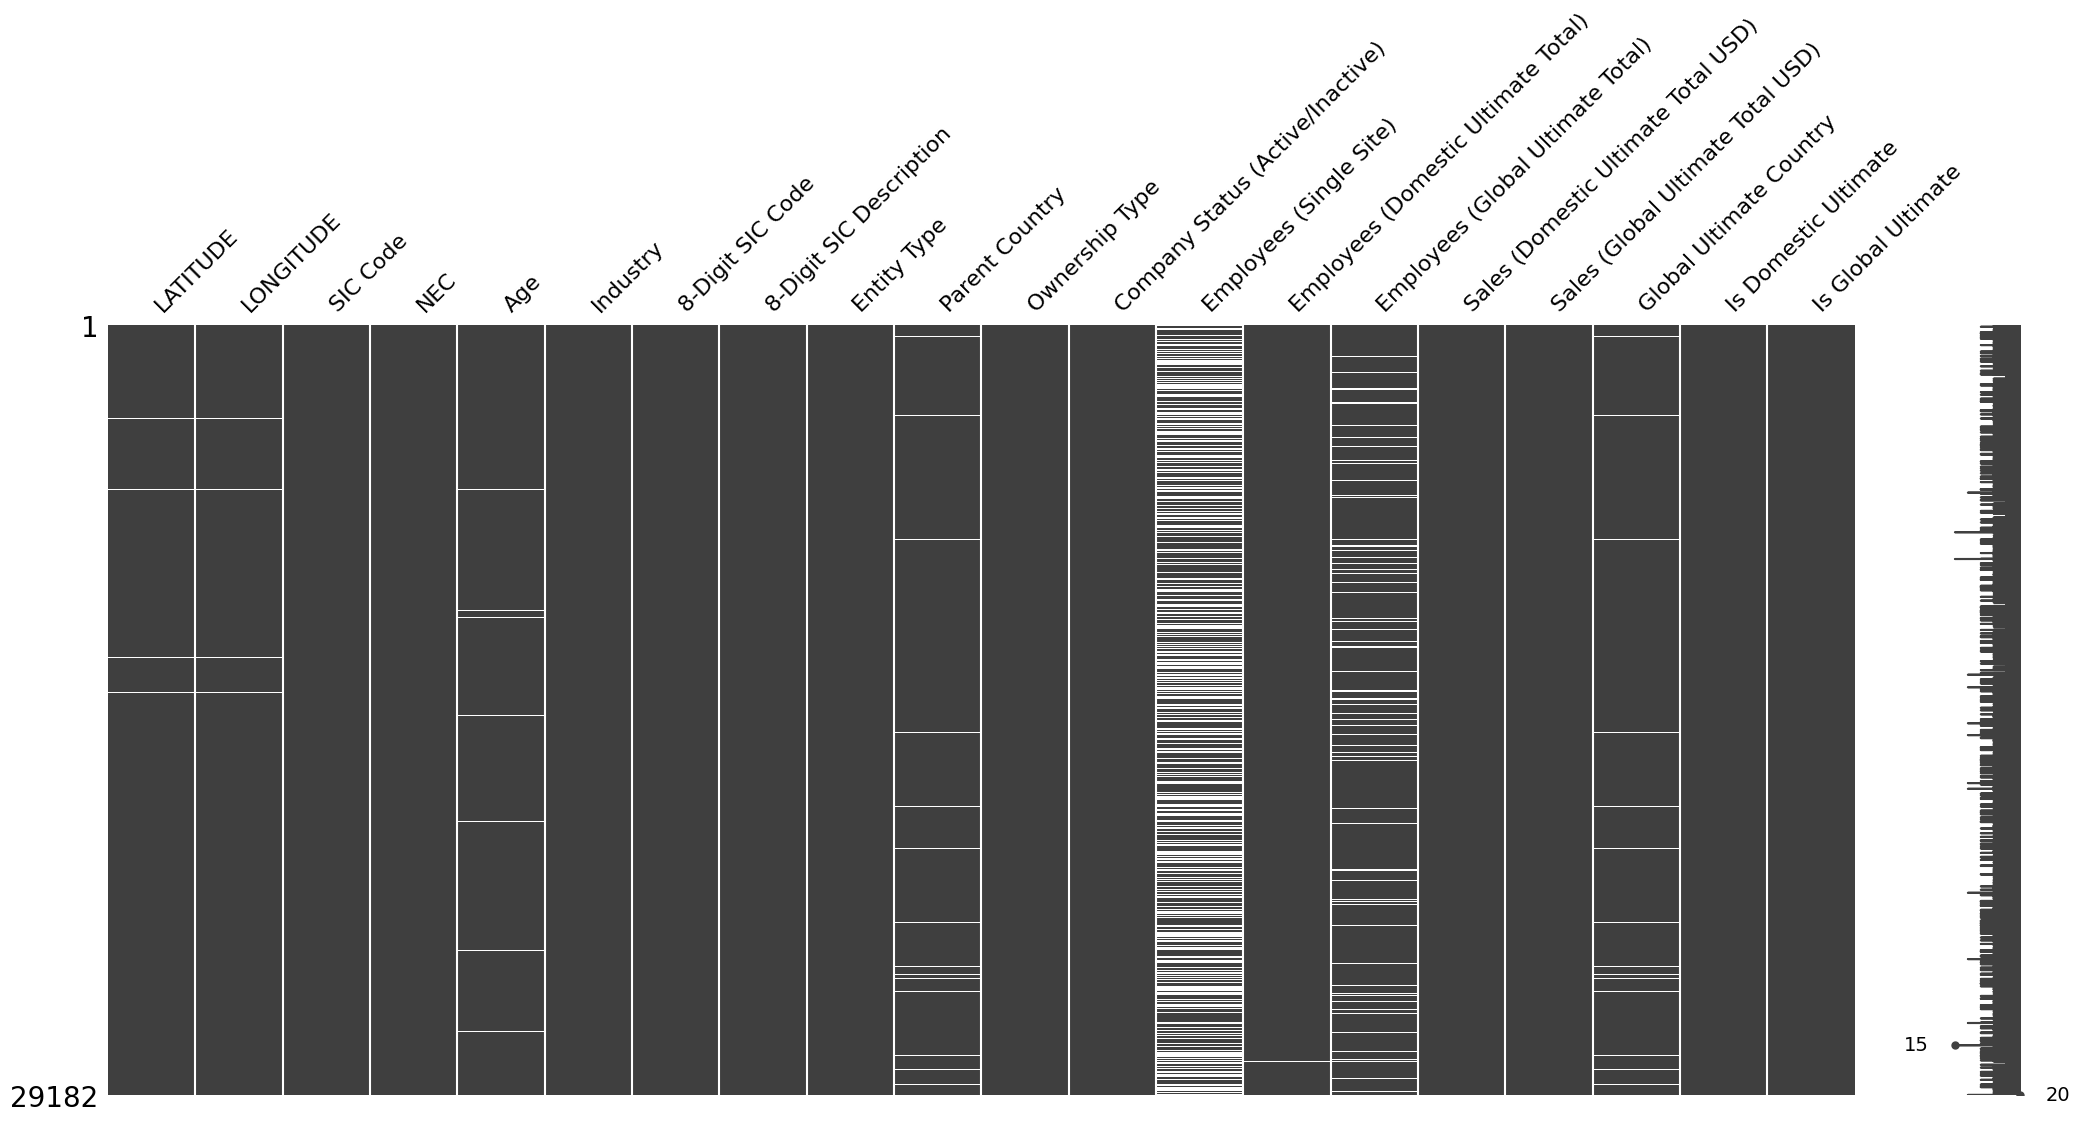

In [33]:
# diagnosing missingness
msno.matrix(data)

In [34]:
# Removing columns with NaNs, but with rows that are little in number 
# Did not remove NaNs from 'Employees (Single Site)' because too much data will be lost 
data = data.dropna(subset=['8-Digit SIC Description', 'Parent Country', 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)', 'Global Ultimate Country', 'LATITUDE', 'LONGITUDE', 'Age'])     

In [35]:
# Replace NaNs in 'Employees (Single Site)' with median
single_site_employees_median = data['Employees (Single Site)'].median(skipna=True)
data['Employees (Single Site)'] = data['Employees (Single Site)'].fillna(single_site_employees_median)
data.isna().sum()

LATITUDE                               0
LONGITUDE                              0
SIC Code                               0
NEC                                    0
Age                                    0
Industry                               0
8-Digit SIC Code                       0
8-Digit SIC Description                0
Entity Type                            0
Parent Country                         0
Ownership Type                         0
Company Status (Active/Inactive)       0
Employees (Single Site)                0
Employees (Domestic Ultimate Total)    0
Employees (Global Ultimate Total)      0
Sales (Domestic Ultimate Total USD)    0
Sales (Global Ultimate Total USD)      0
Global Ultimate Country                0
Is Domestic Ultimate                   0
Is Global Ultimate                     0
dtype: int64

### Section 2: Exploratory Data Analysis
##### placeholder text

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [36]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [37]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

[]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!